# Loan defaulter prediction

## This problem is mainly applied to banking industries. This model will help in identifying the individuals who will be loan defaulter

In [116]:
import warnings
warnings.filterwarnings('ignore')
import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve
from scikitplot.metrics import plot_cumulative_gain as pcg

In [117]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [118]:
row, col = df.shape

In [119]:
(df['Status'].value_counts()/ row) * 100

0    75.355485
1    24.644515
Name: Status, dtype: float64

In [120]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

In [121]:
df.dropna(subset = ['submission_of_application', 'age', 'loan_purpose', 'approv_in_adv', 'loan_limit'], inplace = True)

In [122]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.497585
Interest_rate_spread         24.497585
Upfront_charges              26.619664
term                          0.028452
Neg_ammortization             0.083967
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.143369
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.130989
credit_type                   0.000000
Credit_Score             

In [123]:
df.dropna(subset = ['Neg_ammortization', 'term'], inplace = True)

In [124]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.492504
Interest_rate_spread         24.492504
Upfront_charges              26.612802
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.140890
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.137194
credit_type                   0.000000
Credit_Score             

In [125]:
df['rate_of_interest'].dtype

dtype('float64')

In [126]:
imputer = IterativeImputer(random_state = 100, max_iter = 25)

In [127]:
df_train = df.loc[:, ['rate_of_interest']]

In [128]:
df_train.head()

,rate_of_interest
0,NaN
1,NaN
2,4.56
3,4.25
4,4.00


In [129]:
imputer.fit(df_train)

IterativeImputer(max_iter=25, random_state=100)

In [130]:
df_imputed = imputer.transform(df_train).round(2)
df_imputed[:5]

array([[4.04],
       [4.04],
       [4.56],
       [4.25],
       [4.  ]])

In [131]:
df.loc[:, 'rate_of_interest'] = df_imputed

In [132]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.04,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.04,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [133]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread         24.492504
Upfront_charges              26.612802
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.140890
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.137194
credit_type                   0.000000
Credit_Score             

In [134]:
df['Interest_rate_spread'].dtype

dtype('float64')

In [135]:
df_train_rs = df.loc[:, ['Interest_rate_spread']]
df_train_rs.head()

,Interest_rate_spread
0,NaN
1,NaN
2,0.2000
3,0.6810
4,0.3042


In [136]:
imputer.fit(df_train_rs)

IterativeImputer(max_iter=25, random_state=100)

In [137]:
df_imputed_rs = imputer.transform(df_train_rs).round(4)
df_imputed_rs[:5]

array([[0.4384],
       [0.4384],
       [0.2   ],
       [0.681 ],
       [0.3042]])

In [138]:
df.loc[:, ['Interest_rate_spread']] = df_imputed_rs

In [139]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread          0.000000
Upfront_charges              26.612802
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.140890
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.137194
credit_type                   0.000000
Credit_Score             

In [140]:
df['Upfront_charges'].dtypes

dtype('float64')

In [141]:
df_train_UC = df.loc[:, ['Upfront_charges']]
imputer.fit(df_train_UC)

IterativeImputer(max_iter=25, random_state=100)

In [142]:
df_imputed_UC = imputer.transform(df_train_UC).round(2)
df_imputed_UC[:5]

array([[3231.67],
       [3231.67],
       [ 595.  ],
       [3231.67],
       [   0.  ]])

In [143]:
df.loc[:, ['Upfront_charges']] = df_imputed_UC

In [144]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread          0.000000
Upfront_charges               0.000000
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.140890
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.137194
credit_type                   0.000000
Credit_Score             

In [145]:
df['property_value'].dtype

dtype('float64')

In [146]:
df_train_PV = df.loc[:, ['property_value']]
df_train_PV.head()

,property_value
0,118000.0
1,NaN
2,508000.0
3,658000.0
4,758000.0


In [147]:
df_imputed_PV = imputer.transform(df_train_PV).round(1)
df_imputed_PV[:5]

array([[118000. ],
       [  3231.7],
       [508000. ],
       [658000. ],
       [758000. ]])

In [148]:
df.loc[:, ['property_value']] = df_imputed_PV

In [149]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread          0.000000
Upfront_charges               0.000000
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value                0.000000
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.137194
credit_type                   0.000000
Credit_Score             

In [150]:
df['income'].dtype

dtype('float64')

In [151]:
df_train_IN = df.loc[:, ['income']]
df_train_IN.head()

,income
0,1740.0
1,4980.0
2,9480.0
3,11880.0
4,10440.0


In [152]:
df_imputed_IN = imputer.transform(df_train_IN).round(1)
df_imputed_IN[:5]

array([[ 1740.],
       [ 4980.],
       [ 9480.],
       [11880.],
       [10440.]])

In [153]:
df.loc[:, ['income']] = df_imputed_IN

In [154]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread          0.000000
Upfront_charges               0.000000
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value                0.000000
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        0.000000
credit_type                   0.000000
Credit_Score             

In [155]:
df['LTV'].dtype

dtype('float64')

In [156]:
df_train_LTV = df.loc[:, ['LTV']]
df_train_LTV.head()

,LTV
0,98.728814
1,NaN
2,80.019685
3,69.376900
4,91.886544


In [157]:
df_imputed_LTV = imputer.transform(df_train_LTV)
df_imputed_LTV[:5]

array([[  98.72881356],
       [3231.66794718],
       [  80.01968504],
       [  69.3768997 ],
       [  91.88654354]])

In [158]:
df.loc[:, ['LTV']] = df_imputed_LTV

In [159]:
(df.isnull().sum()/ len(df)) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread          0.000000
Upfront_charges               0.000000
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value                0.000000
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        0.000000
credit_type                   0.000000
Credit_Score             

In [160]:
df['dtir1'].dtype

dtype('float64')

In [161]:
px.box(df, y = 'dtir1')

In [162]:
dtir1_median = df['dtir1'].median()
dtir1_median

39.0

In [163]:
df['dtir1'] = df['dtir1'].replace(np.nan, dtir1_median)

In [164]:
(df.isnull().sum()/ len(df)) * 100

ID                           0.0
year                         0.0
loan_limit                   0.0
Gender                       0.0
approv_in_adv                0.0
loan_type                    0.0
loan_purpose                 0.0
Credit_Worthiness            0.0
open_credit                  0.0
business_or_commercial       0.0
loan_amount                  0.0
rate_of_interest             0.0
Interest_rate_spread         0.0
Upfront_charges              0.0
term                         0.0
Neg_ammortization            0.0
interest_only                0.0
lump_sum_payment             0.0
property_value               0.0
construction_type            0.0
occupancy_type               0.0
Secured_by                   0.0
total_units                  0.0
income                       0.0
credit_type                  0.0
Credit_Score                 0.0
co-applicant_credit_type     0.0
age                          0.0
submission_of_application    0.0
LTV                          0.0
Region    

In [165]:
((df['Status'].value_counts()/ row) * 100).round()

0    73.0
1    24.0
Name: Status, dtype: float64

In [166]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [167]:
df1 = df.copy()

In [168]:
binary = []
multiclass = []

for i in df.columns:
    if df[i].dtypes == 'O':
        if df[i].nunique() == 2 and i != 'Status':
            binary.append(i)
        else:
            multiclass.append(i)

In [169]:
binary

['loan_limit',
 'approv_in_adv',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'Secured_by',
 'co-applicant_credit_type',
 'submission_of_application',
 'Security_Type']

In [170]:
multiclass

['Gender',
 'loan_type',
 'loan_purpose',
 'occupancy_type',
 'total_units',
 'credit_type',
 'age',
 'Region']

In [171]:
le = LabelEncoder()

for j in binary:
    df[j] = le.fit_transform(df[j])

In [172]:
for k in multiclass:
    df = pd.get_dummies(df, prefix = [k], columns = [k])

In [173]:
df.head()

,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,Status,dtir1,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,24890,2019,0,0,0,0,1,116500,4.04,0.4384,3231.67,360.0,1,1,1,118000.0,1,0,1740.0,758,0,1,98.728814,1,1,45.0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,24891,2019,0,0,0,0,0,206500,4.04,0.4384,3231.67,360.0,1,1,0,3231.7,1,0,4980.0,552,1,1,3231.667947,1,1,39.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,24892,2019,0,1,0,0,1,406500,4.56,0.2000,595.00,360.0,0,1,1,508000.0,1,0,9480.0,834,0,1,80.019685,1,0,46.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,24893,2019,0,0,0,0,1,456500,4.25,0.6810,3231.67,360.0,1,1,1,658000.0,1,0,11880.0,587,0,0,69.376900,1,0,42.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,24894,2019,0,1,0,0,1,696500,4.00,0.3042,0.00,360.0,1,1,1,758000.0,1,0,10440.0,602,1,0,91.886544,1,0,39.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [174]:
df = df.drop('ID', axis = 1)

In [175]:
df.head()

,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,Status,dtir1,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,2019,0,0,0,0,1,116500,4.04,0.4384,3231.67,360.0,1,1,1,118000.0,1,0,1740.0,758,0,1,98.728814,1,1,45.0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,2019,0,0,0,0,0,206500,4.04,0.4384,3231.67,360.0,1,1,0,3231.7,1,0,4980.0,552,1,1,3231.667947,1,1,39.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,2019,0,1,0,0,1,406500,4.56,0.2000,595.00,360.0,0,1,1,508000.0,1,0,9480.0,834,0,1,80.019685,1,0,46.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,2019,0,0,0,0,1,456500,4.25,0.6810,3231.67,360.0,1,1,1,658000.0,1,0,11880.0,587,0,0,69.376900,1,0,42.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,2019,0,1,0,0,1,696500,4.00,0.3042,0.00,360.0,1,1,1,758000.0,1,0,10440.0,602,1,0,91.886544,1,0,39.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [176]:
x = df.drop('Status', axis = 1)
y = df['Status']

In [177]:
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)
etr_model.feature_importances_

array([0.00000000e+00, 2.04973240e-04, 2.13521519e-04, 4.54663995e-03,
       2.02605466e-04, 8.18799160e-03, 1.91893586e-04, 2.35073513e-01,
       1.95247471e-01, 1.55754474e-01, 5.03213619e-04, 1.06892048e-02,
       2.99192490e-04, 1.65728129e-02, 7.92769653e-05, 0.00000000e+00,
       0.00000000e+00, 1.66717669e-04, 7.85774944e-07, 7.52373503e-05,
       6.63210787e-03, 3.81828033e-03, 0.00000000e+00, 6.96597477e-03,
       6.91647208e-07, 3.74796202e-06, 2.00349351e-07, 7.37396917e-07,
       4.34371450e-03, 3.47623835e-03, 5.71685505e-04, 3.98354675e-05,
       6.50771754e-05, 6.89447668e-05, 1.58875802e-04, 1.43024647e-03,
       1.07922982e-05, 1.15332686e-07, 2.68971681e-05, 0.00000000e+00,
       3.38089530e-07, 0.00000000e+00, 2.50436689e-07, 9.93349761e-07,
       3.44371522e-01, 6.19082723e-08, 1.31461544e-06, 0.00000000e+00,
       2.40197569e-07, 2.12143476e-07, 6.85584601e-07, 0.00000000e+00,
       0.00000000e+00, 6.93687268e-07, 0.00000000e+00, 0.00000000e+00,
      

<Axes: >

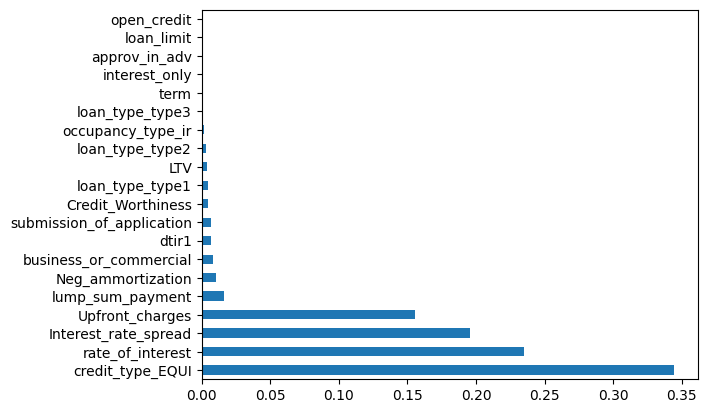

In [178]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [179]:
x = df[['credit_type_EQUI', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'lump_sum_payment', 'Neg_ammortization', 'dtir1', 'loan_type_type2', 'dtir1', 'business_or_commercial']]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [181]:
sum(y_train == 1)/ len(y_train)

0.2433120901107859

In [182]:
sum(y_train == 0)/ len(y_train)

0.7566879098892141

In [183]:
mms = MinMaxScaler()

In [185]:
X_train = pd.DataFrame(mms.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test),columns = X_test.columns)

In [186]:
sm = SMOTE(k_neighbors = 10)

In [187]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [188]:
sum(y_train == 1)/ len(y_train)

0.5

In [189]:
sum(y_train == 0)/ len(y_train)

0.5

In [190]:
X_train.head()

,credit_type_EQUI,rate_of_interest,Interest_rate_spread,Upfront_charges,lump_sum_payment,Neg_ammortization,dtir1,loan_type_type2,dtir1,business_or_commercial
0,0.0,0.5050,0.582759,0.053861,1.0,1.0,0.339286,0.0,0.339286,1.0
1,0.0,0.5700,0.619871,0.000000,1.0,1.0,0.696429,0.0,0.696429,1.0
2,0.0,0.4525,0.636855,0.072833,1.0,1.0,0.696429,0.0,0.696429,1.0
3,0.0,0.5000,0.585132,0.017500,1.0,1.0,0.625000,0.0,0.625000,1.0
4,0.0,0.4525,0.607691,0.074333,1.0,1.0,0.625000,0.0,0.625000,1.0


# Logistic Regression

In [191]:
LR = LogisticRegression()

In [192]:
LR.fit(X_train, y_train)

LogisticRegression()

In [193]:
y_pred_LR = LR.predict(X_test)

In [194]:
conf_matr = confusion_matrix(y_test, y_pred_LR)
conf_matr

array([[24641,  2357],
       [ 3596,  5392]])

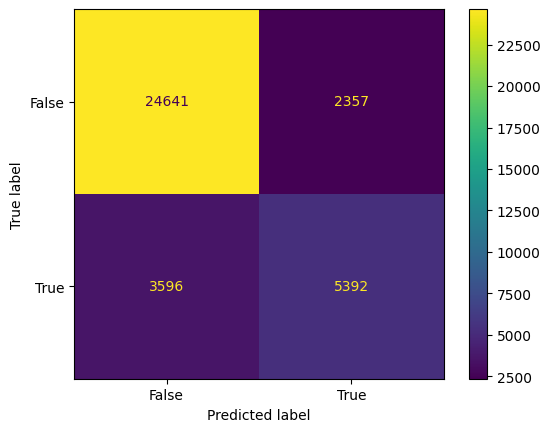

In [195]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matr, display_labels = [False, True])

cm_display.plot()
plt.show()

In [196]:
roc=roc_auc_score(y_test, y_pred_LR)
acc = accuracy_score(y_test, y_pred_LR)
prec = precision_score(y_test, y_pred_LR)
rec = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.834575,0.695832,0.599911,0.644321,0.756304


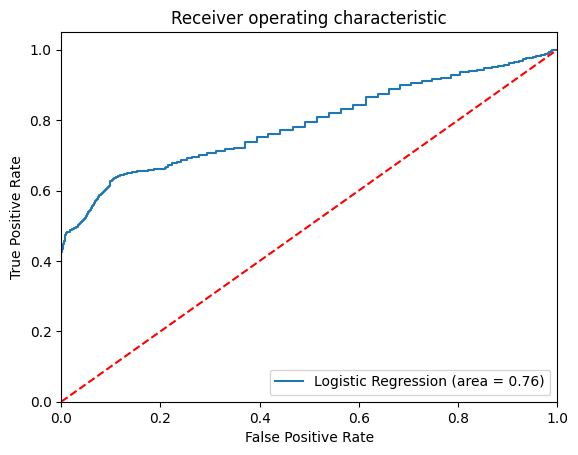

In [197]:
logit_roc_auc=roc_auc_score(y_test,LR.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

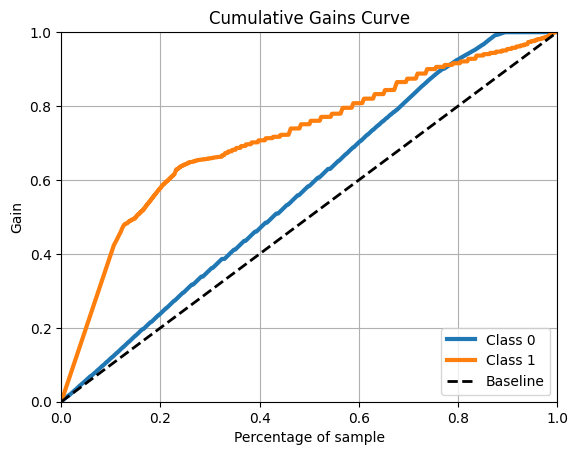

In [198]:
probs = LR.predict_proba(X_test)

pcg(y_test, probs)
plt.show()

# Decision Tree Classifier

In [199]:
DT = DecisionTreeClassifier()

In [200]:
DT_train = DT.fit(X_train, y_train)

In [201]:
y_pred_DT = DT.predict(X_test)

In [202]:
conf_matr_DT = confusion_matrix(y_test, y_pred_DT)
conf_matr_DT

array([[26998,     0],
       [    0,  8988]])

In [203]:
roc=roc_auc_score(y_test, y_pred_DT)
acc = accuracy_score(y_test, y_pred_DT)
prec = precision_score(y_test, y_pred_DT)
rec = recall_score(y_test, y_pred_DT)
f1 = f1_score(y_test, y_pred_DT)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,1.0,1.0,1.0,1.0,1.0


In [204]:
DT_train.tree_.max_depth

2

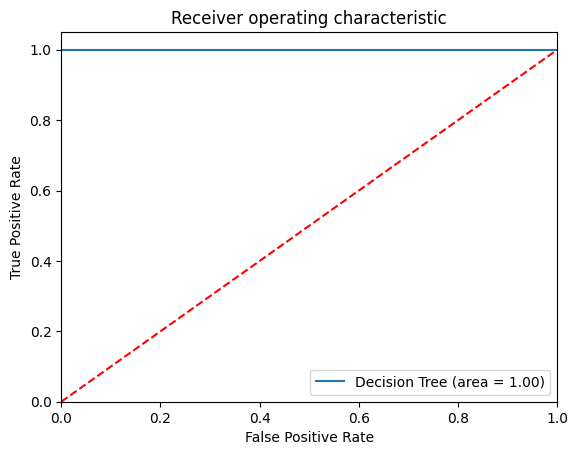

In [205]:
dt_roc_auc = roc_auc_score(y_test,DT.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,DT.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

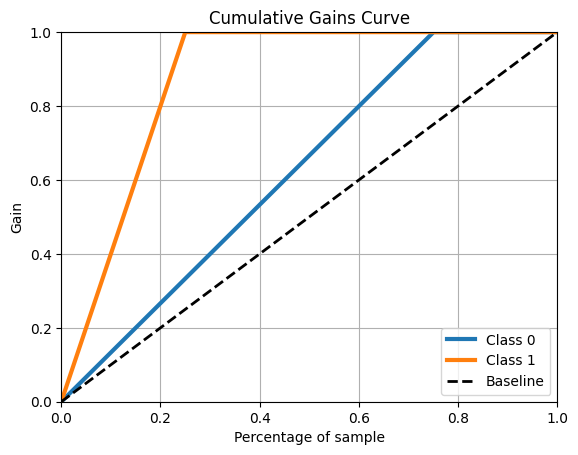

In [206]:
probs1 = DT.predict_proba(X_test)

pcg(y_test, probs1)
plt.show()

# KNN Classifier

In [207]:
error = []

In [208]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(math.sqrt(mean_squared_error(y_test, y_pred_KNN)))

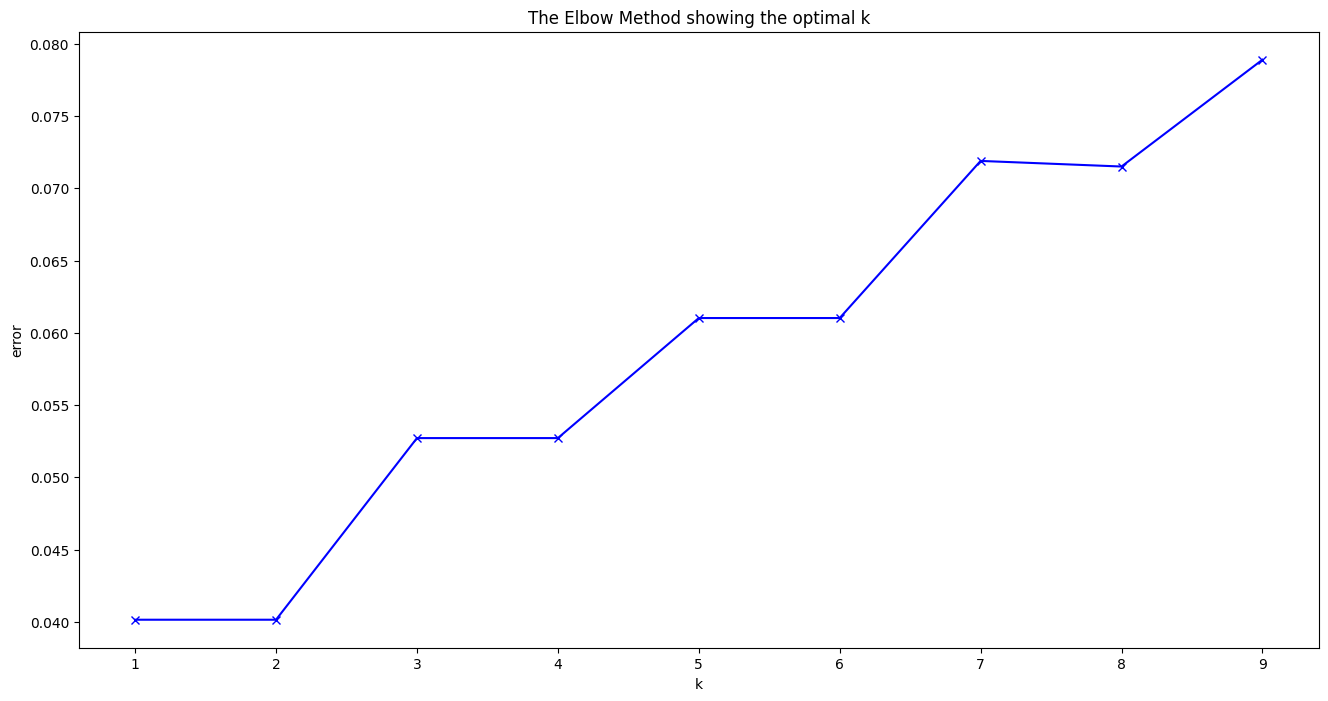

In [209]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [210]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

In [211]:
conf_matr_K = confusion_matrix(y_test, y_pred_KNN)
conf_matr_K

array([[26898,   100],
       [    0,  8988]])

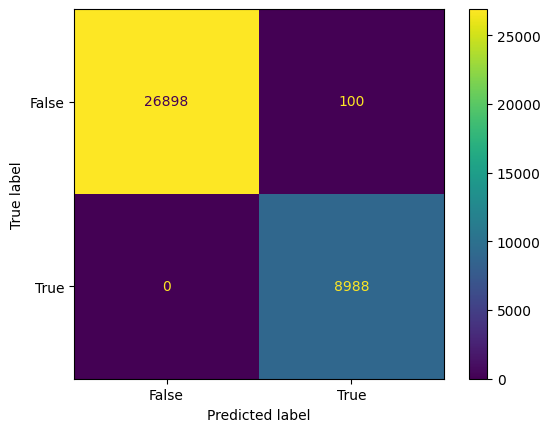

In [212]:
cm_display_KNN = ConfusionMatrixDisplay(confusion_matrix = conf_matr_K, display_labels = [False, True])

cm_display_KNN.plot()
plt.show()

In [213]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

results = pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.997221,0.988996,1.0,0.994468,0.998148


# Random Forest Classifier

In [214]:
x = df.drop('Status', axis = 1)
y = df['Status']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [216]:
X_train = pd.DataFrame(mms.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test),columns = X_test.columns)

In [217]:
RF = RandomForestClassifier()

In [218]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
y_pred_RF = RF.predict(X_test)

In [220]:
conf_matr_RF = confusion_matrix(y_test, y_pred_RF)
conf_matr_RF

array([[21597,     0],
       [    0,  7192]])

In [221]:
roc=roc_auc_score(y_test, y_pred_RF)
acc = accuracy_score(y_test, y_pred_RF)
prec = precision_score(y_test, y_pred_RF)
rec = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)

results = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.0,1.0,1.0,1.0,1.0


# Hyperparameter tuning of Random Forest Classifier

In [222]:
## Using Randomsearch cv
def random_search(model,X_train,Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=4,random_state=42,n_jobs=-1,error_score='raise') 
    random.fit(X_train,Y_train)
    print(random.best_params_)

In [223]:
RF_para_grid = {
            "max_leaf_nodes": list(range(10, 50)),
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "n_estimators": list(range(1, 200))
           }
random_search(RandomForestClassifier(),X_train,y_train,param_grid=RF_para_grid)

{'n_estimators': 28, 'min_weight_fraction_leaf': 0.1, 'max_leaf_nodes': 28, 'max_features': None}


In [224]:
RF1 = RandomForestClassifier(n_estimators = 28, min_weight_fraction_leaf = 0.1, max_leaf_nodes = 28)

In [225]:
RF1.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=28, min_weight_fraction_leaf=0.1,
                       n_estimators=28)

In [226]:
y_pred_RF_tune = RF1.predict(X_test)

In [227]:
conf_matr_RF_tune = confusion_matrix(y_test, y_pred_RF_tune)
conf_matr_RF_tune

array([[21594,     3],
       [ 2811,  4381]])

In [228]:
roc=roc_auc_score(y_test, y_pred_RF_tune)
acc = accuracy_score(y_test, y_pred_RF_tune)
prec = precision_score(y_test, y_pred_RF_tune)
rec = recall_score(y_test, y_pred_RF_tune)
f1 = f1_score(y_test, y_pred_RF_tune)

results = pd.DataFrame([['Random Forest after hyperparameter tuning', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest after hyperparameter tuning,0.902254,0.999316,0.609149,0.756911,0.804505


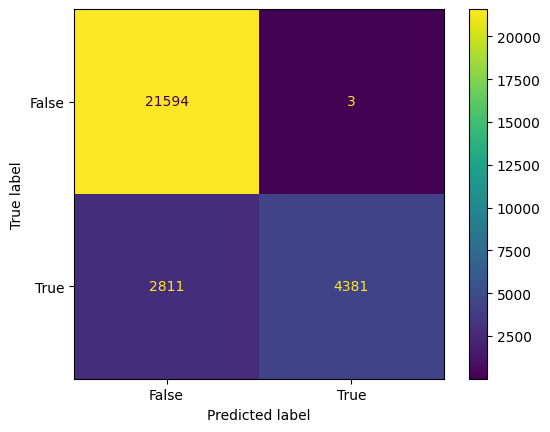

In [229]:
cm_display_RF_tune = ConfusionMatrixDisplay(confusion_matrix = conf_matr_RF_tune, display_labels = [False, True])

cm_display_RF_tune.plot()
plt.show()

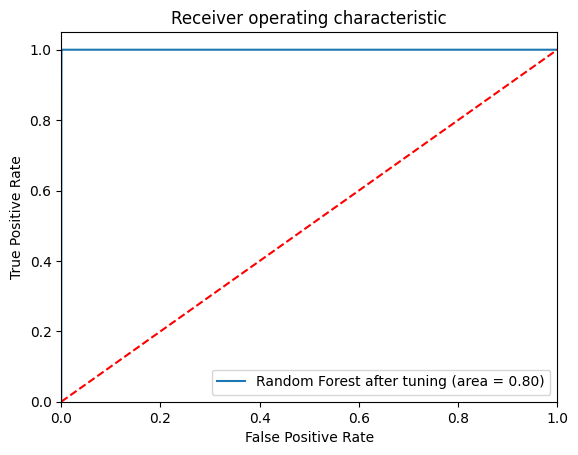

In [230]:
rf_roc_auc = roc_auc_score(y_test,RF1.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,RF1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest after tuning (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

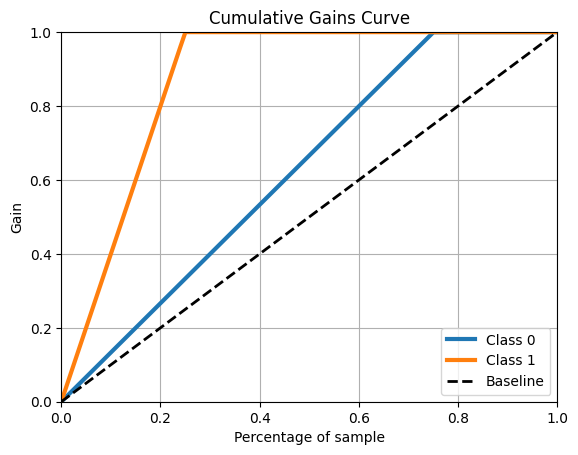

In [231]:
probs1 = RF1.predict_proba(X_test)

pcg(y_test, probs1)
plt.show()